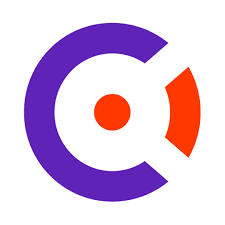
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Bisiklet satışları

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 1) Veriyi yükleme ve kurcalama

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Eğer Google Collab kullanıyorsan (ve eğer aşağıdaki yorumdaysa) aşağıdaki hücreyi yorumdan çıkarıp çalıştır, ve bir onun altındaki hücredeki dosya yolunu drive'daki dosya yoluyla değiştir. Verimizi bu şekilde yükleyeceğiz.

In [17]:
# Eğer Google Collab kullanıyorsan
# (ve eğer bu hücre yorumdaysa)
# bu hücreyi yorumdan çıkarıp çalıştır,
# ve bir aşağıdaki hücredeki dosya yolunu değiştir.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
sales = pd.read_csv("/content/drive/MyDrive/VeriAnaliziGiris-main/data/sales_data.csv", parse_dates=['Date'])

In [22]:
sales.head()

,Date,Day,Month,Year,Musteri_Yasi,Yas_Grubu,Musteri_Cinsiyeti,Ulke,Eyalet,Urun_Kategorisi,Alt_Kategori,Urun,Siparis_Miktari,Birim_Maliyeti,Birim_Fiyati,Kazanc,Maliyet,Hasilat
0,2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,NaN,2295.0,561.0,1252.0,1813.0
1,2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2.0,2171.0,3578.0,1097.0,4342.0,5439.0
2,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1.0,1519.0,2443.0,900.0,1519.0,2419.0
3,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1.0,344.0,540.0,185.0,344.0,529.0
4,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3.0,713.0,1120.0,482.0,2139.0,2621.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### `Customers_Age` ortalaması kaç?

$$\text{Ortalama} = \frac{\text{Tüm Değerlerin Toplamı}}{\text{Veri Sayısı}}$$

In [30]:
toplam_yas = sum(sales['Musteri_Yasi'])
toplam_yas / sales.shape[0]

35.91921157861212

`.mean()` ile deneyelim ( `.item()` ile sadece değeri alabiliyoruz)

In [31]:
sales['Musteri_Yasi'].mean().item()

35.91921157861212

`Customer_Age` verisiyle bir <b>yoğunluk (*KDE, Kernel density estimation*)</b> ve <b>kutu grafiği</b> çizdirelim:

<Axes: ylabel='Density'>

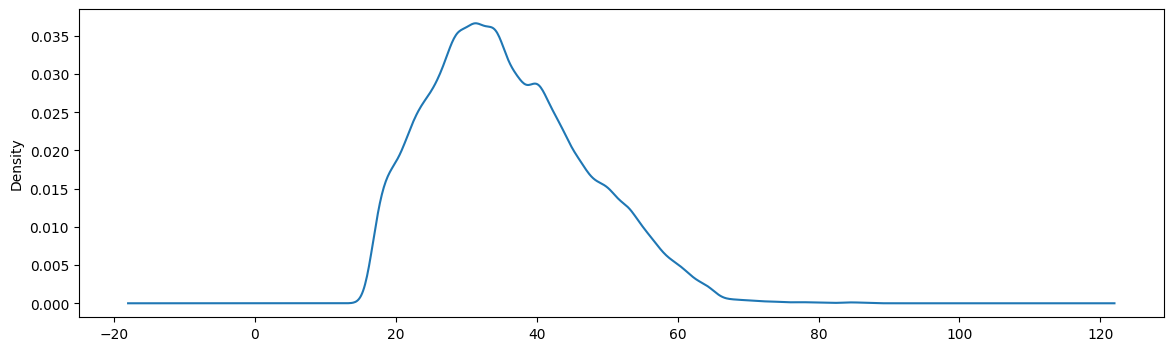

In [32]:
sales['Musteri_Yasi'].plot(kind='kde', figsize=(14,4))

<Axes: >

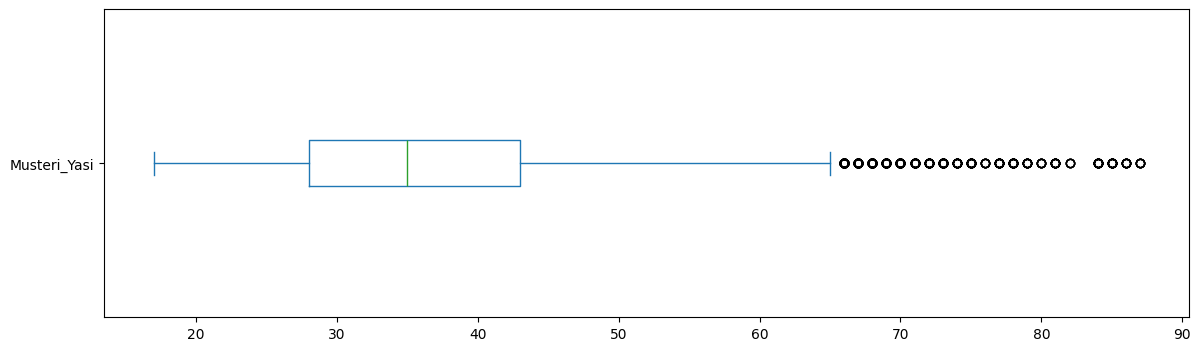

In [33]:
sales['Musteri_Yasi'].plot(kind='box', vert=False, figsize=(14,4))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 2) Veriyi temizleme

Önce verinin özelliklerini inceleyelim:

In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               113036 non-null  datetime64[ns]
 1   Day                113036 non-null  int64         
 2   Month              113036 non-null  object        
 3   Year               113036 non-null  int64         
 4   Musteri_Yasi       113036 non-null  int64         
 5   Yas_Grubu          113036 non-null  object        
 6   Musteri_Cinsiyeti  113036 non-null  object        
 7   Ulke               113036 non-null  object        
 8   Eyalet             113036 non-null  object        
 9   Urun_Kategorisi    113036 non-null  object        
 10  Alt_Kategori       113036 non-null  object        
 11  Urun               113036 non-null  object        
 12  Siparis_Miktari    111943 non-null  float64       
 13  Birim_Maliyeti     112170 non-null  float64 

Adımlarımızı hatırlayalım. Veride temizlememiz gereken bir şey var mı?

In [35]:
sales.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Musteri_Yasi,0
Yas_Grubu,0
Musteri_Cinsiyeti,0
Ulke,0
Eyalet,0
Urun_Kategorisi,0


In [36]:
print(f"Toplam null (boş) veri: {sales.isnull().sum().sum()}")

Toplam null (boş) veri: 5557


In [37]:
sales = sales.dropna()
sales.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Musteri_Yasi,0
Yas_Grubu,0
Musteri_Cinsiyeti,0
Ulke,0
Eyalet,0
Urun_Kategorisi,0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 3) Veriyi detaylı inceleme

Genel bir bakış atalım:

In [38]:
sales.describe()

,Date,Day,Year,Musteri_Yasi,Siparis_Miktari,Birim_Maliyeti,Birim_Fiyati,Kazanc,Maliyet,Hasilat
count,107610,107610.000000,107610.000000,107610.000000,107610.000000,107610.000000,107610.000000,107610.000000,107610.000000,107610.000000
mean,2014-11-23 17:44:03.345414144,15.663396,2014.402463,35.923632,11.901821,267.279686,452.853387,285.050581,469.296627,754.347208
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-23 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,222.000000
75%,2016-01-10 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,420.000000,799.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,14055.000000,40014.000000,54069.000000
std,NaN,8.782093,1.272749,11.026944,9.559438,549.961560,922.105354,451.964295,877.650840,1300.039894


### `Siparis_Miktari` ortalaması?

In [40]:
sales['Siparis_Miktari'].mean().item()

11.901821392063935

`Siprais_Miktari` verisinin <b>histogram</b> ve <b>kutu grafiğini</b> çizdirelim:

<Axes: xlabel='Siparis Miktari', ylabel='Frekans'>

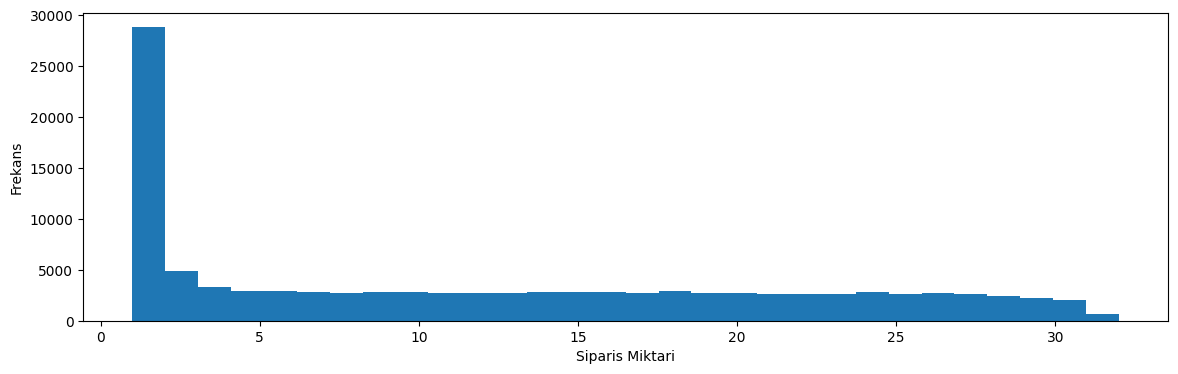

In [43]:
sales['Siparis_Miktari'].plot(kind='hist', bins=30, figsize=(14,4), ylabel="Frekans", xlabel="Siparis Miktari")

<Axes: >

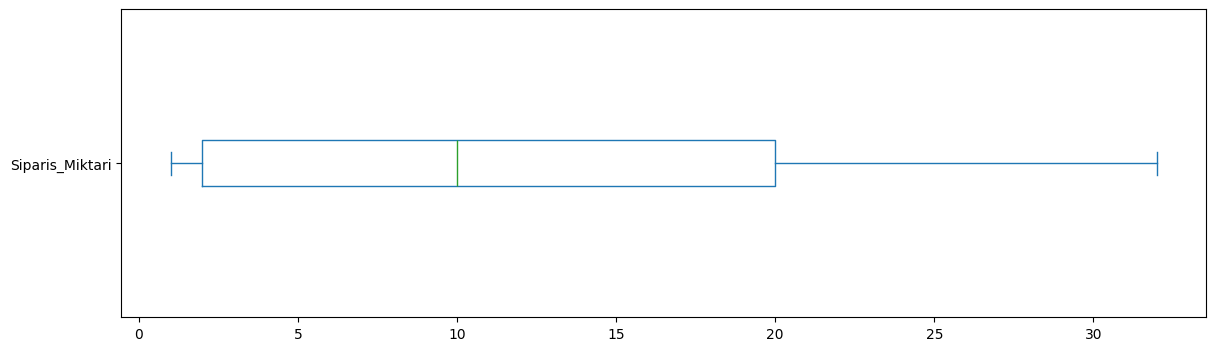

In [44]:
sales['Siparis_Miktari'].plot(kind='box', vert=False, figsize=(14,4))

Medyan (Ortanca): Küçükten büyüğe (veya büyükten küçüğe) sıralanmış bir veri setini tam ortadan ikiye bölen değerdir.

In [45]:
sales['Siparis_Miktari'].median()

10.0

### Yıllık ne kadar satışımız var?

In [46]:
sales['Year'].value_counts()

,count
Year,
2016,28016
2014,27983
2015,23271
2013,23240
2011,2554
2012,2546


Bu verinin bir <b>pie plot (daire grafiğini)</b> çıkaralım:

<Axes: ylabel='Yillik Satis Miktari'>

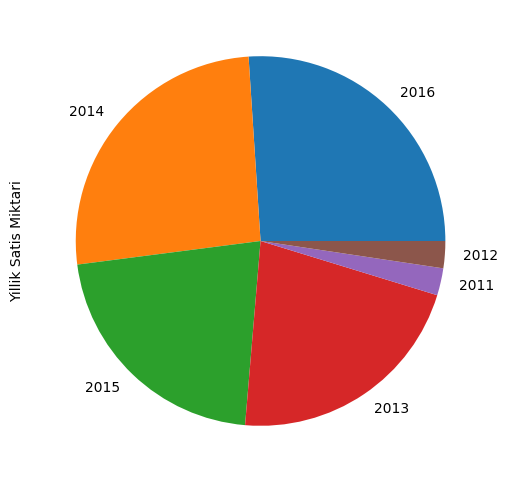

In [47]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6), ylabel="Yillik Satis Miktari")

*Bu veri ne işimize yarayabilir?*

### Aylık ne kadar verimiz var?

Bütün yıllarda aylık ne kadar satış yaptığımıza bakacağız.

In [48]:
sales['Month'].value_counts()

,count
Month,
June,10696
December,10680
May,10583
April,9702
March,9220
January,8847
February,8599
November,8328
October,8312


Bu verinin bir **bar plot'unu (çubuk grafik)** çizdirelim:

<Axes: xlabel='Month'>

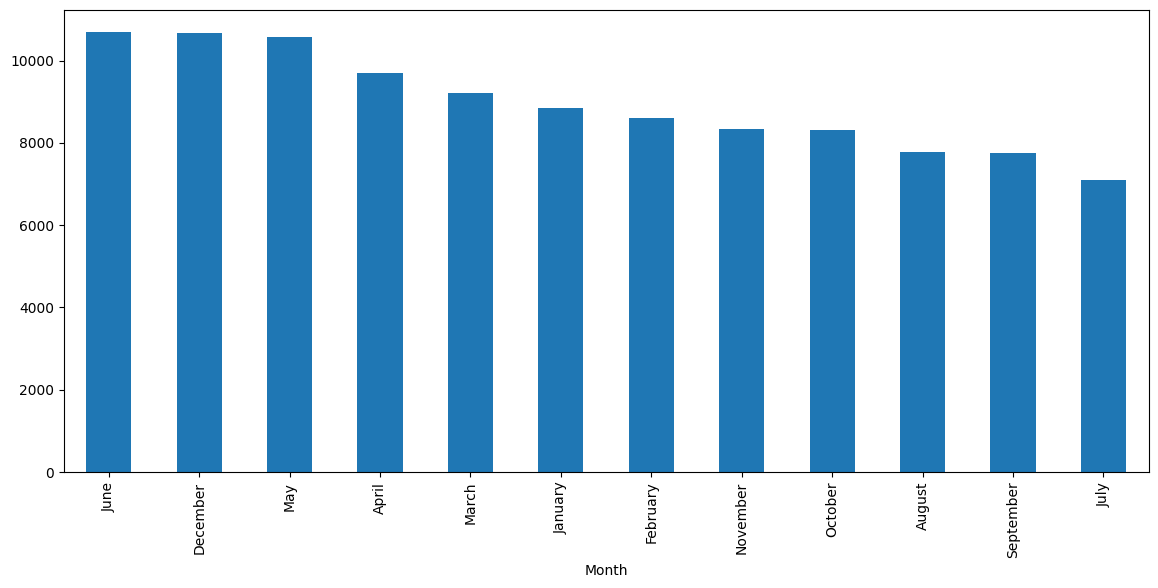

In [49]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

### En çok satışı hangi ülkede yapmışız?

In [50]:
sales['Ulke'].value_counts().head(1)

,count
Ulke,
United States,37404


In [51]:
sales['Ulke'].value_counts()

,count
Ulke,
United States,37404
Australia,22754
Canada,13486
United Kingdom,12933
Germany,10532
France,10501


Ülke başına satışı gösteren bir <b>bar plot (kutu grafiği)</b> çizdirelim:

<Axes: xlabel='Ulke'>

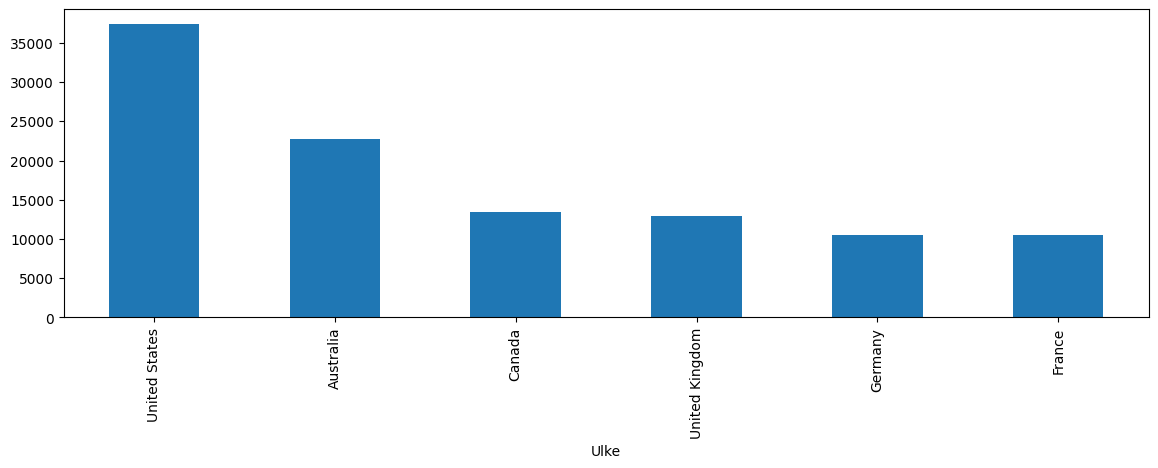

In [52]:
sales['Ulke'].value_counts().plot(kind='bar', figsize=(14,4))

### Peki ya ürünleri incelersek?

Sattığımız bütün ürünlerin isimlerini çıkaralım:

In [53]:
sales['Urun'].unique()

array(['Road-150 Red, 48', 'Road-250 Red, 44', 'Road-750 Black, 44',
       'Road-550-W Yellow, 38', 'Road-250 Red, 58',
       'Road-550-W Yellow, 48', 'Road-550-W Yellow, 40',
       'Mountain-200 Silver, 42', 'Mountain-200 Black, 38',
       'Road-750 Black, 48', 'Road-550-W Yellow, 44', 'Road-150 Red, 52',
       'Road-650 Red, 62', 'Road-650 Red, 48', 'Road-350-W Yellow, 48',
       'Road-650 Black, 60', 'Mountain-500 Black, 44', 'Road-150 Red, 62',
       'Road-350-W Yellow, 42', 'Road-350-W Yellow, 40',
       'Road-750 Black, 52', 'Mountain-200 Black, 46',
       'Mountain-200 Black, 42', 'Road-350-W Yellow, 44',
       'Road-650 Black, 48', 'Road-250 Black, 52',
       'Mountain-200 Silver, 38', 'Mountain-400-W Silver, 42',
       'Mountain-500 Black, 40', 'Road-250 Black, 58',
       'Road-250 Black, 44', 'Mountain-100 Silver, 44',
       'Road-250 Black, 48', 'Road-750 Black, 58',
       'Road-550-W Yellow, 42', 'Mountain-100 Black, 48',
       'Mountain-200 Silver, 46', 'Ro

Tamam, ama çok fazla ürün var ve benim için anlamlı olanlar en çok sattıklarım, en çok satılan **10 ürünü** bastıralım:

<Axes: xlabel='Urun'>

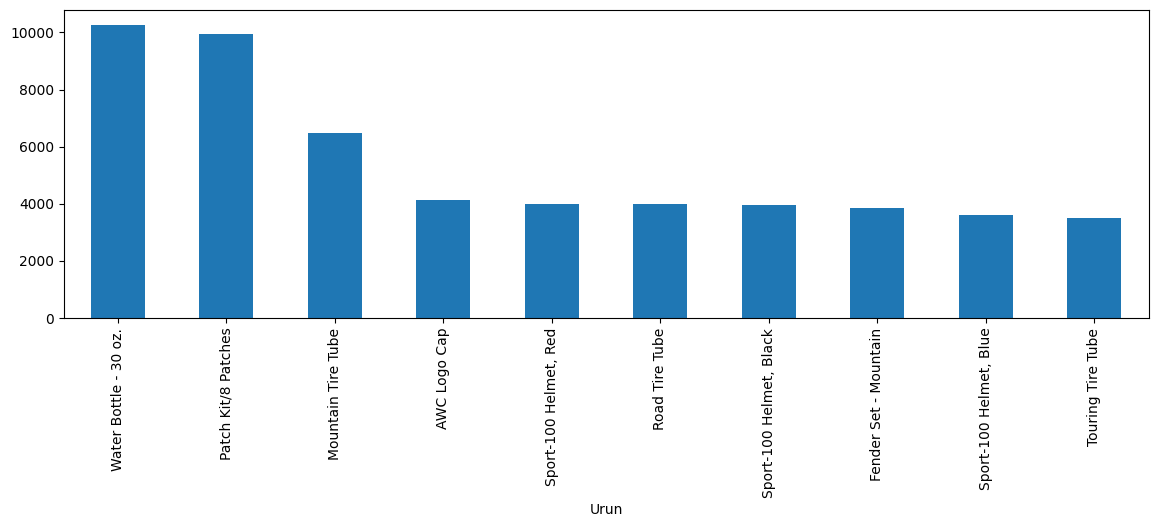

In [54]:
sales['Urun'].value_counts().head(10).plot(kind='bar', figsize=(14,4))

### Satışların Yaş Gruplarına göre dağılımı

<Axes: ylabel='count'>

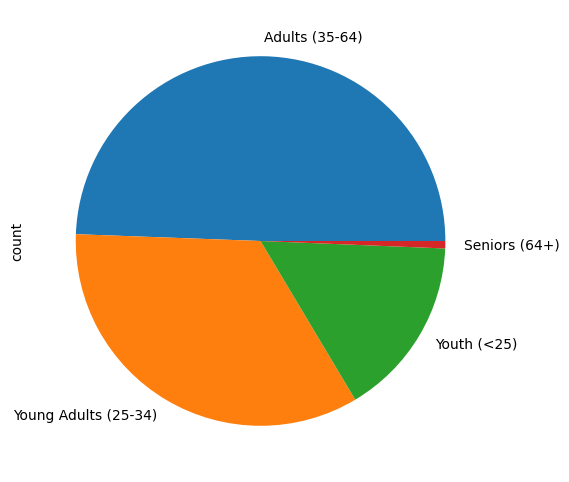

In [55]:
sales['Yas_Grubu'].value_counts().plot(kind='pie', figsize=(6,6))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 4) Bağlantılar Kurmak

### `Birim_Maliyeti` ve `Birim_Fiyati` arasında bir bağlantı var mı?

Şu ana kadar hep tek değer üzerinden analiz yaptık, şimdiyse iki değer arasında bir bağlantı kurmaya çalışacağız. İki değeri kullanarak bir <b>scatter plot (serpme grafiği)</b> çizdirelim.

<Axes: xlabel='Birim_Maliyeti', ylabel='Birim_Fiyati'>

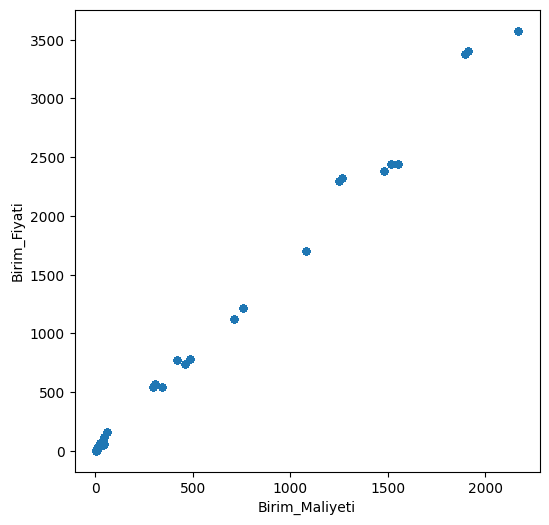

In [56]:
sales.plot(kind='scatter', x='Birim_Maliyeti', y='Birim_Fiyati', figsize=(6,6))

### `Siparis_Miktari` ve `Kazanc` arasında bir ilişki var mı?

İki sütunu kullanarak bir **scatter plot** çizdirelim.

<Axes: xlabel='Siparis_Miktari', ylabel='Kazanc'>

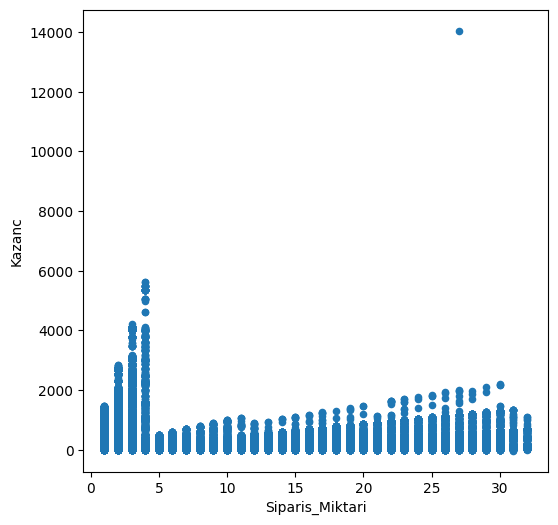

In [59]:
sales.plot(kind='scatter', x='Siparis_Miktari', y='Kazanc', figsize=(6,6))

### `Ulke` başına `Kazanc`

Ülke başına ortalama kazancı gördüğümüz biz **bar plot** çizdirelim:

<Axes: xlabel='Ulke'>

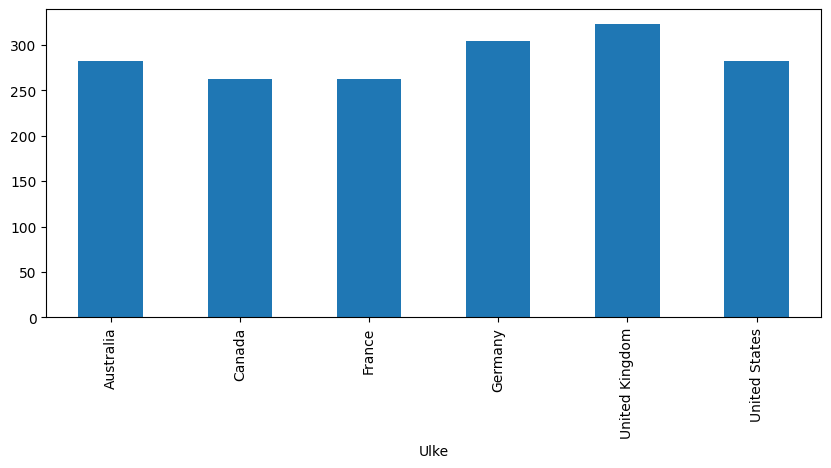

In [60]:
sales.groupby('Ulke')['Kazanc'].mean().plot(kind='bar', figsize=(10,4))

Her ülke için kazançları gösteren bir **kutu grafiği** yapalım.

<Axes: title={'center': 'Kazanc'}, xlabel='[Ulke]'>

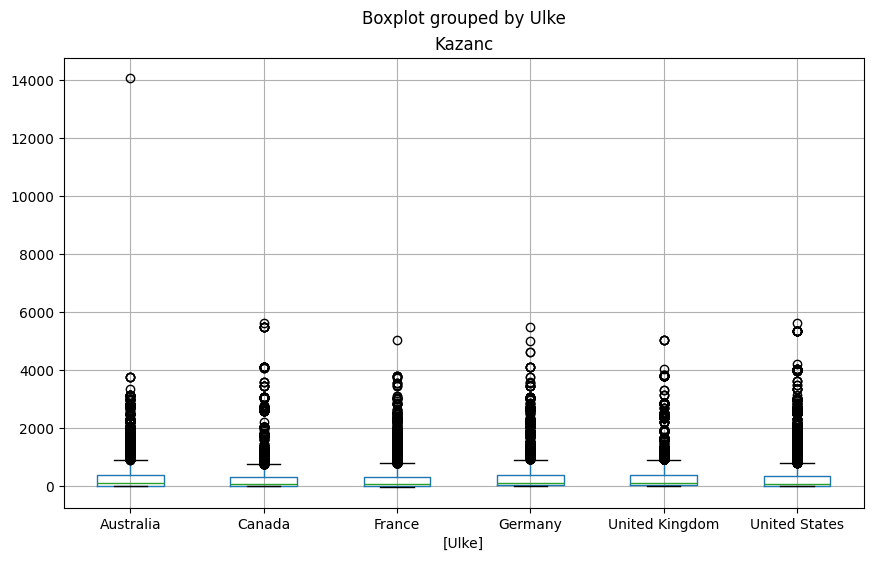

In [61]:
sales[['Kazanc', 'Ulke']].boxplot(by='Ulke', figsize=(10,6))

### `Ulke` başına `Musteri_Yasi`'nda bir ilişki var mı?

<Axes: title={'center': 'Musteri_Yasi'}, xlabel='[Ulke]'>

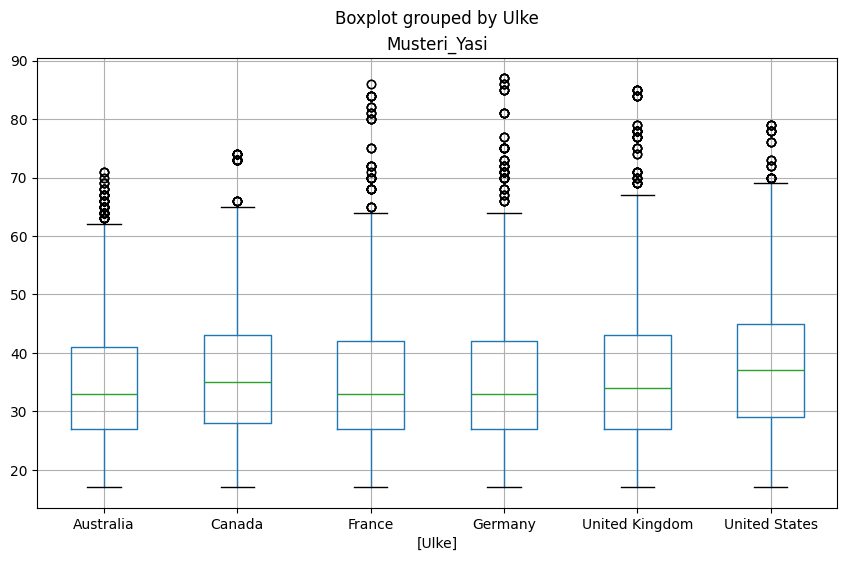

In [62]:
sales[['Musteri_Yasi', 'Ulke']].boxplot(by='Ulke', figsize=(10,6))

### `Hesaplanmis_Tarih` adında yeni bir sütun hesapla ve ekle

`Day`(Gün), `Month`(Ay) ve `Year`(Yıl) verisini kullanarak `Tarih` adında yeni bir sütun ekleyeceğiz ve formatı şu şekilde olacak: (`YYYY-MM-DD`).

In [63]:
sales['Hesaplanmis_Tarih'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Hesaplanmis_Tarih'].head()

/tmp/ipython-input-1190354597.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales['Hesaplanmis_Tarih'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
/tmp/ipython-input-1190354597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Hesaplanmis_Tarih'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)


,Hesaplanmis_Tarih
1,2011-January-1
2,2011-January-1
3,2011-January-1
4,2011-January-1
5,2011-January-2


#### `Hesaplanmis_Tarih` sütununu veriye `datetime` formatında ekleyelim

In [64]:
sales['Hesaplanmis_Tarih'] = pd.to_datetime(sales['Hesaplanmis_Tarih'])

sales['Hesaplanmis_Tarih'].head()

/tmp/ipython-input-2142878805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Hesaplanmis_Tarih'] = pd.to_datetime(sales['Hesaplanmis_Tarih'])


,Hesaplanmis_Tarih
1,2011-01-01
2,2011-01-01
3,2011-01-01
4,2011-01-01
5,2011-01-02


### `Canada` ve `France`'da ne kadar satış olmuş?

In [65]:
sales.loc[(sales['Ulke'] == 'Canada') | (sales['Ulke'] == 'France')].shape[0]

23987

### Kadın-Erkek satış oranı

In [66]:
sales['Musteri_Cinsiyeti'].value_counts()

,count
Musteri_Cinsiyeti,
M,55570
F,52040


<Axes: xlabel='Musteri_Cinsiyeti'>

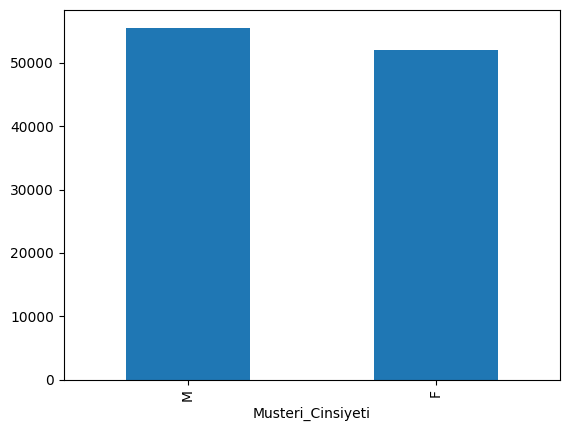

In [67]:
sales['Musteri_Cinsiyeti'].value_counts().plot(kind='bar')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 5) Daha Detaylı Sorular Sormak

### 500'den daha fazla `Hasilat` değerine sahip satışların kaç tanesi kadınlar tarafından yapıldı?

In [68]:
sales.loc[(sales['Musteri_Cinsiyeti'] == 'F') & (sales['Hasilat'] == 500)].shape[0]

25

### En çok `hasilat` getiren 5 satis

In [69]:
sales.sort_values(['Hasilat'], ascending=False).head(5)

,Date,Day,Month,Year,Musteri_Yasi,Yas_Grubu,Musteri_Cinsiyeti,Ulke,Eyalet,Urun_Kategorisi,Alt_Kategori,Urun,Siparis_Miktari,Birim_Maliyeti,Birim_Fiyati,Kazanc,Maliyet,Hasilat,Hesaplanmis_Tarih
8193,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27.0,1482.0,2384.0,14055.0,40014.0,54069.0,2013-07-24
1261,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4.0,2171.0,3578.0,5628.0,8684.0,14312.0,2011-07-08
485,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,Road Bikes,"Road-150 Red, 48",4.0,2171.0,3578.0,5485.0,8684.0,14169.0,2011-03-20
848,2011-05-12,12,May,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4.0,2171.0,3578.0,5485.0,8684.0,14169.0,2011-05-12
264,2011-02-11,11,February,2011,39,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 52",4.0,2171.0,3578.0,5485.0,8684.0,14169.0,2011-02-11


### En çok `Hasilat` yapan satış

In [70]:
cond = sales['Hasilat'] == sales['Hasilat'].max()

sales.loc[cond]

,Date,Day,Month,Year,Musteri_Yasi,Yas_Grubu,Musteri_Cinsiyeti,Ulke,Eyalet,Urun_Kategorisi,Alt_Kategori,Urun,Siparis_Miktari,Birim_Maliyeti,Birim_Fiyati,Kazanc,Maliyet,Hasilat,Hesaplanmis_Tarih
8193,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27.0,1482.0,2384.0,14055.0,40014.0,54069.0,2013-07-24


### 2016 Mayıs'ta ne kadar sipariş verildi?

In [71]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

4759

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## 6) Bir analiz yapalım

Her ay ne kadar satış yaptığımıza bakalım:

### Korelasyon bulabilir miyiz?

Veride manalı bir ilişki var mı?

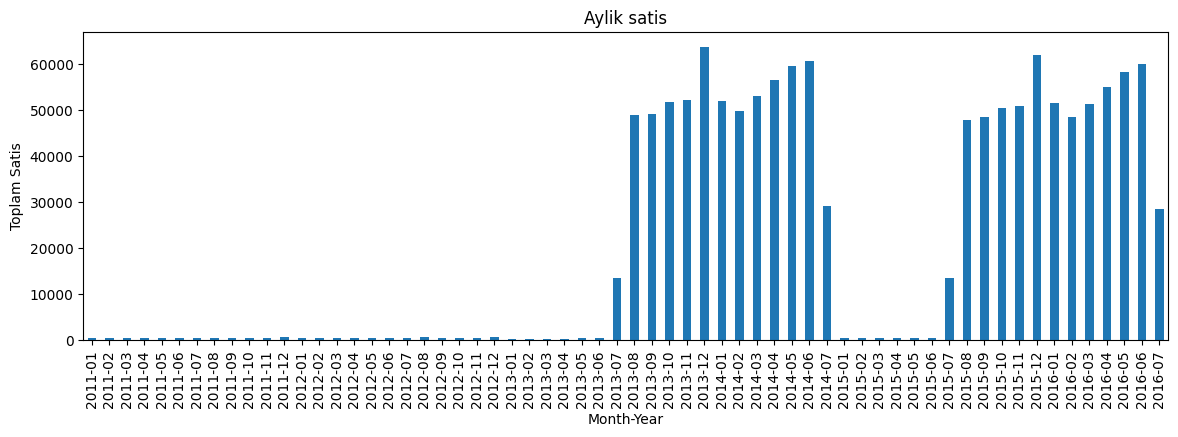

In [72]:
sales.groupby(sales['Hesaplanmis_Tarih'].dt.to_period('M'))['Siparis_Miktari'].sum().plot(kind='bar', figsize=(14, 4))
plt.xlabel('Month-Year')
plt.ylabel('Toplam Satis')
plt.title('Aylik satis')
plt.show()

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

**Korelasyon matrisi**

Korelasyon, iki değişken arasındaki ilişkinin yönünü (artıyor mu, azalıyor mu) ve şiddetini (ne kadar güçlü) ölçen istatistiksel bir katsayıdır.

Biz burada [Pearson Korelasyon Katsayısı](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) kullanacağız. (Dikkat! Pearson korelasyonu sayısal ve sürekli veri için mantıklıdır ama başka veri tiplerinde ilişkileri yakalayamaz.)

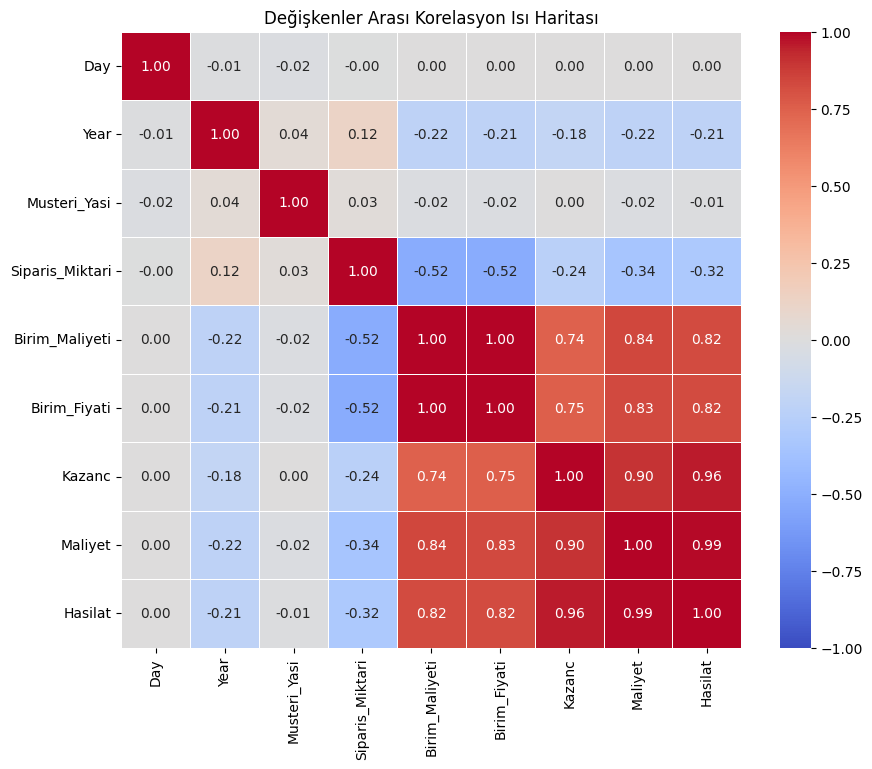

In [79]:
corr = sales.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,       # Kutucukların içine korelasyon katsayılarını yazar
            cmap='coolwarm',  # Renk paleti (Kırmızı sıcak/pozitif, Mavi soğuk/negatif ilişkiyi gösterir)
            fmt=".2f",        # Sayıların virgülden sonra kaç basamak görüneceği
            linewidths=0.5,   # Kutular arasındaki çizgilerin kalınlığı
            vmin=-1, vmax=1)  # Skalayı -1 (Mavi) ve +1 (Kırmızı) arasına sabitler

plt.title("Değişkenler Arası Korelasyon Isı Haritası")
plt.show()

Artık çok daha fazlasını yapmaya hazırız.

## Machine learning

Veriyi eğitime hazırlayalım.

In [89]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107610 entries, 1 to 113035
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               107610 non-null  datetime64[ns]
 1   Day                107610 non-null  int64         
 2   Month              107610 non-null  object        
 3   Year               107610 non-null  int64         
 4   Musteri_Yasi       107610 non-null  int64         
 5   Yas_Grubu          107610 non-null  object        
 6   Musteri_Cinsiyeti  107610 non-null  object        
 7   Ulke               107610 non-null  object        
 8   Eyalet             107610 non-null  object        
 9   Urun_Kategorisi    107610 non-null  object        
 10  Alt_Kategori       107610 non-null  object        
 11  Urun               107610 non-null  object        
 12  Siparis_Miktari    107610 non-null  float64       
 13  Birim_Maliyeti     107610 non-null  float64      

In [91]:
sales["Urun_Kategorisi"].unique()

array(['Bikes', 'Accessories', 'Clothing'], dtype=object)

In [94]:
sales["Musteri_Cinsiyeti"].unique()

array(['F', 'M'], dtype=object)

In [95]:
sales["Alt_Kategori"].unique()

array(['Road Bikes', 'Mountain Bikes', 'Bike Stands', 'Bottles and Cages',
       'Helmets', 'Jerseys', 'Tires and Tubes', 'Touring Bikes', 'Caps',
       'Fenders', 'Gloves', 'Socks', 'Hydration Packs', 'Vests',
       'Cleaners', 'Bike Racks', 'Shorts'], dtype=object)

In [107]:
sales["Urun"].unique()[0:10]

array(['Road-150 Red, 48', 'Road-250 Red, 44', 'Road-750 Black, 44',
       'Road-550-W Yellow, 38', 'Road-250 Red, 58',
       'Road-550-W Yellow, 48', 'Road-550-W Yellow, 40',
       'Mountain-200 Silver, 42', 'Mountain-200 Black, 38',
       'Road-750 Black, 48'], dtype=object)

In [109]:
sales["Ulke"].unique()

array(['France', 'Canada', 'United States', 'Australia', 'United Kingdom',
       'Germany'], dtype=object)

Dönüşümlere başlayabiliriz.

In [101]:
cinsiyet_sozlugu = {'M': 0, 'F': 1}

sales['Musteri_Cinsiyeti_Sayisal'] = sales['Musteri_Cinsiyeti'].map(cinsiyet_sozlugu)

print(sales[['Musteri_Cinsiyeti', 'Musteri_Cinsiyeti_Sayisal']].head())

  Musteri_Cinsiyeti  Musteri_Cinsiyeti_Sayisal
1                 F                          1
2                 M                          0
3                 M                          0
4                 M                          0
5                 F                          1


/tmp/ipython-input-1028268137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Musteri_Cinsiyeti_Sayisal'] = sales['Musteri_Cinsiyeti'].map(cinsiyet_sozlugu)


In [98]:
sales['Alt_Kategori_Sayisal'] = sales['Alt_Kategori'].astype('category').cat.codes

print(sales[['Alt_Kategori', 'Alt_Kategori_Sayisal']].head(15))

      Alt_Kategori  Alt_Kategori_Kod
1       Road Bikes                11
2       Road Bikes                11
3       Road Bikes                11
4       Road Bikes                11
5       Road Bikes                11
6       Road Bikes                11
7       Road Bikes                11
8       Road Bikes                11
9   Mountain Bikes                10
10  Mountain Bikes                10
11  Mountain Bikes                10
12      Road Bikes                11
13      Road Bikes                11
14      Road Bikes                11
15      Road Bikes                11


/tmp/ipython-input-2039852593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Alt_Kategori_Kod'] = sales['Alt_Kategori'].astype('category').cat.codes


In [111]:
sales['Urun_Sayisal'] = sales['Urun'].astype('category').cat.codes
sales['Urun_Kategorisi_Sayisal'] = sales['Urun_Kategorisi'].astype('category').cat.codes
sales['Ulke_Sayisal'] = sales['Ulke'].astype('category').cat.codes
sales.head()

/tmp/ipython-input-4030183814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Urun_Sayisal'] = sales['Urun'].astype('category').cat.codes
/tmp/ipython-input-4030183814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Urun_Kategorisi_Sayisal'] = sales['Urun_Kategorisi'].astype('category').cat.codes
/tmp/ipython-input-4030183814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,Date,Day,Month,Year,Musteri_Yasi,Yas_Grubu,Musteri_Cinsiyeti,Ulke,Eyalet,Urun_Kategorisi,...,Birim_Fiyati,Kazanc,Maliyet,Hasilat,Hesaplanmis_Tarih,Alt_Kategori_Kod,Musteri_Cinsiyeti_Sayisal,Urun_Sayisal,Urun_Kategorisi_Sayisal,Ulke_Sayisal
1,2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,...,3578.0,1097.0,4342.0,5439.0,2011-01-01,11,1,58,1,2
2,2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,...,2443.0,900.0,1519.0,2419.0,2011-01-01,11,0,66,1,1
3,2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,...,540.0,185.0,344.0,529.0,2011-01-01,11,0,91,1,5
4,2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,...,1120.0,482.0,2139.0,2621.0,2011-01-01,11,0,74,1,5
5,2011-01-02,2,January,2011,41,Adults (35-64),F,Australia,Queensland,Bikes,...,2443.0,1491.0,4665.0,6156.0,2011-01-02,11,1,69,1,0


In [114]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107610 entries, 1 to 113035
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Date                       107610 non-null  datetime64[ns]
 1   Day                        107610 non-null  int64         
 2   Month                      107610 non-null  object        
 3   Year                       107610 non-null  int64         
 4   Musteri_Yasi               107610 non-null  int64         
 5   Yas_Grubu                  107610 non-null  object        
 6   Musteri_Cinsiyeti          107610 non-null  object        
 7   Ulke                       107610 non-null  object        
 8   Eyalet                     107610 non-null  object        
 9   Urun_Kategorisi            107610 non-null  object        
 10  Alt_Kategori               107610 non-null  object        
 11  Urun                       107610 non-null  object       

In [138]:
sales_temiz = sales.drop(columns=['Date', 'Day', 'Month', 'Year', 'Yas_Grubu',
                                  'Musteri_Cinsiyeti', 'Ulke', 'Eyalet',
                                  'Urun_Kategorisi', 'Alt_Kategori', 'Urun',
                                  'Hesaplanmis_Tarih', 'Birim_Maliyeti', 'Birim_Fiyati', 'Maliyet', 'Hasilat'], errors='ignore')

sales_temiz.head()

,Musteri_Yasi,Siparis_Miktari,Kazanc,Alt_Kategori_Kod,Musteri_Cinsiyeti_Sayisal,Urun_Sayisal,Urun_Kategorisi_Sayisal,Ulke_Sayisal
1,33,2.0,1097.0,11,1,58,1,2
2,17,1.0,900.0,11,0,66,1,1
3,42,1.0,185.0,11,0,91,1,5
4,39,3.0,482.0,11,0,74,1,5
5,41,3.0,1491.0,11,1,69,1,0


In [141]:
# Integer olamyanlari Integer yapalim. (Yani tam sayi)
sales_temiz = sales_temiz.astype(int)

# Kazanc sutununu en sona alalim.
tasinan = sales_temiz.pop('Kazanc')
sales_temiz['Kazanc'] = tasinan

sales_temiz.head()

,Musteri_Yasi,Siparis_Miktari,Alt_Kategori_Kod,Musteri_Cinsiyeti_Sayisal,Urun_Sayisal,Urun_Kategorisi_Sayisal,Ulke_Sayisal,Kazanc
1,33,2,11,1,58,1,2,1097
2,17,1,11,0,66,1,1,900
3,42,1,11,0,91,1,5,185
4,39,3,11,0,74,1,5,482
5,41,3,11,1,69,1,0,1491


### Model Eğitimi

In [142]:
# X ve y ayırımı
X = sales_temiz.drop(columns=['Kazanc'])
y = sales_temiz['Kazanc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Modeli kur ve eğit
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Genel başarı skoru
print(f"Model Başarı Skoru: %{model.score(X_test, y_test) * 100:.1f}")

Model Başarı Skoru: %95.7


**Buradaki skorun anlamı:** Modelim, verideki değişimi (varyansı) ortalama bir tahminciden ne kadar daha iyi açıklıyor?

$SS_{res}$ Modelinizin yaptığı tahminlerin gerçek değerlerden ne kadar saptığının karesidir.
$$ SS_{\text{res}}: \sum (y_{gerçek} - y_{tahmin})^2$$

$SS_{\text{tot}}$ (Total Sum of Squares - Toplam Varyans):
Verilerin, sadece ortalamaya kıyasla ne kadar dağıldığıdır. Yani en basit model (her şeye ortalamayı tahmin eden model) ne kadar hata yapardı?

$$SS_{\text{tot}} : \sum (y_{gerçek} - \text{Ortalama}_y)^2$$

O zaman bu sayının bizim için anlamı:

* $R^2 = 1$ (Mükemmel): Modelin hatası ($SS_{\text{res}}$) sıfırdır. Veriyi kusursuz tahmin eder.

* $R^2 = 0$ (Kötü): Model sadece verinin ortalamasını söyleyen (mean) dümdüz bir çizgiden farksızdır. Hiçbir şey öğrenmemiştir.

* $R^2 < 0$ (Felaket): Model ortalama değerden bile daha kötü tahminler yapıyor demektir (Veriye uymayan saçma bir çizgi çizmiş olabilir).

In [144]:
ornek_indexler = X_test.sample(10).index
gercekler = y_test.loc[ornek_indexler]
tahminler = model.predict(X_test.loc[ornek_indexler])

karsilastirma = pd.DataFrame({
    'Gerçek Kazanç': gercekler.values,
    'Modelin Tahmini': tahminler,
    'Fark': gercekler.values - tahminler
})

print("\nÖrnek Karşılaştırma Tablosu")
print(karsilastirma)


Örnek Karşılaştırma Tablosu
   Gerçek Kazanç  Modelin Tahmini       Fark
0           1335      1335.000000   0.000000
1              3         3.000000   0.000000
2             78        78.000000   0.000000
3            155       155.000000   0.000000
4            442       353.000000  89.000000
5            570       570.000000   0.000000
6            382       428.000000 -46.000000
7            207       207.000000   0.000000
8             25        17.000000   8.000000
9             19        18.714286   0.285714
